<a href="https://colab.research.google.com/github/apoorva14-unique/Data_science_with_python.ipynb/blob/main/2_Sales_Performance_Analysis_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data loaded sucessfully.

Dataset shape: (9994, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  

<ipython-input-20-b0b9a1840270>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Sales"].fillna(df["Sales"].mean(), inplace=True)  # Use fillna() on the specific column
<ipython-input-20-b0b9a1840270>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'd

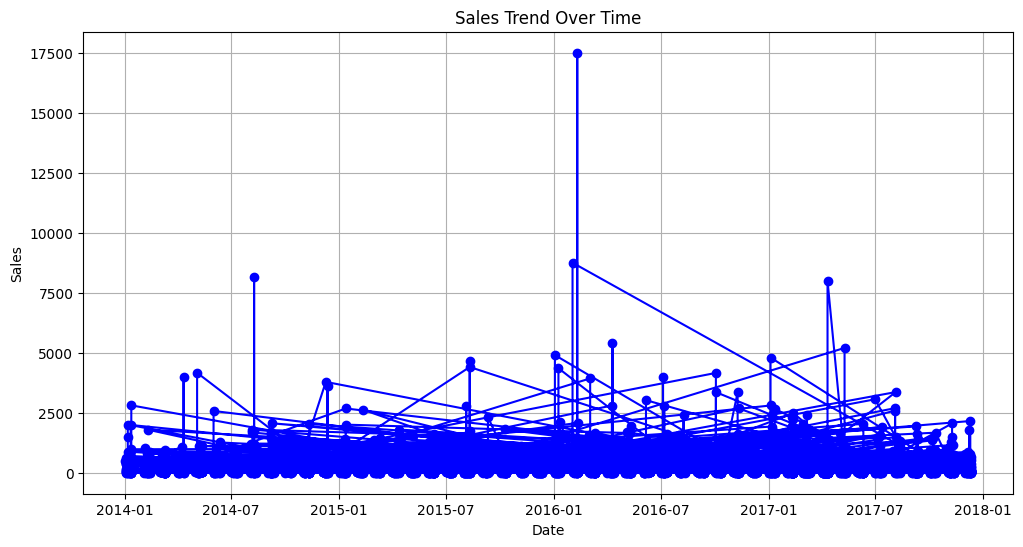

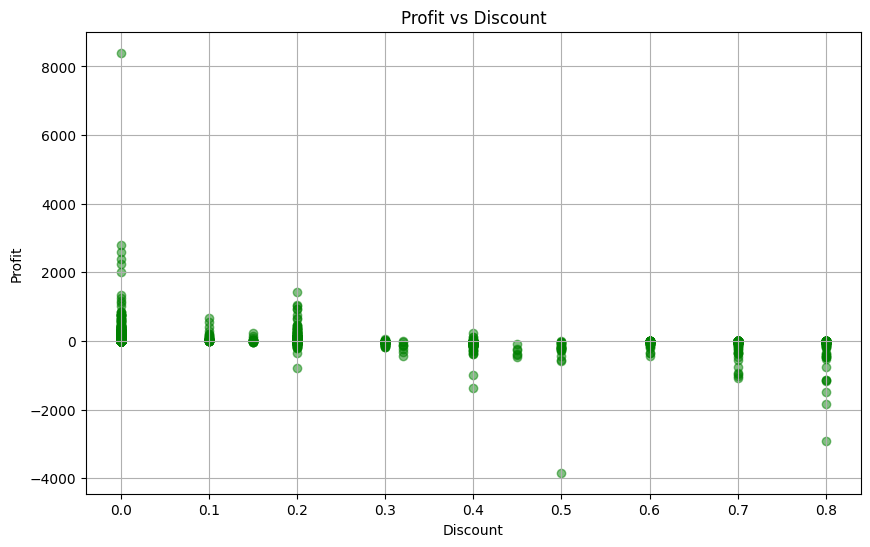

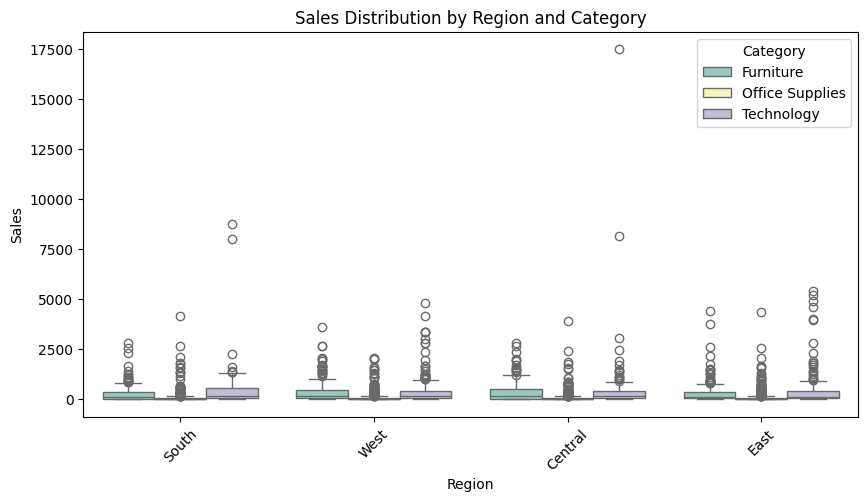

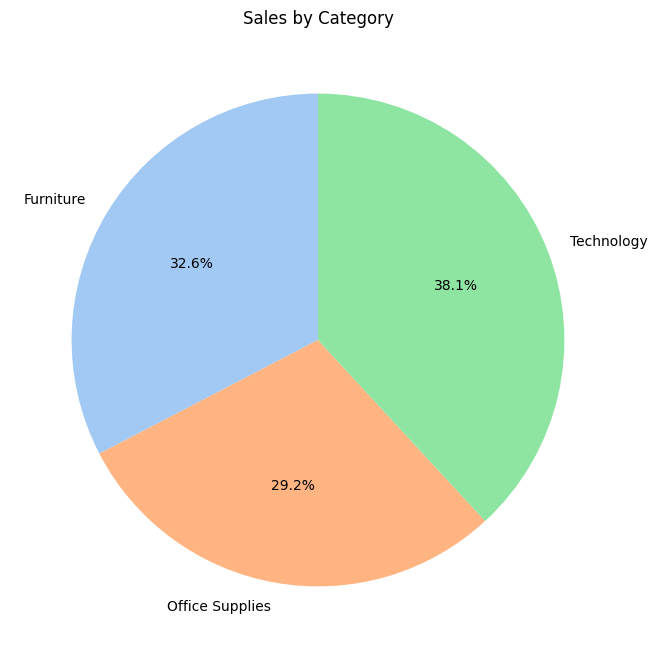

Mean Squared Error: 146657.24510088083
R-squared: 0.47518935685940544

Feature Importance:
    Feature  Importance
0  Discount  269.754838
1    Profit    1.297032

Top Performing Regions:
Region
West       276879.0215
East       249123.1290
Central    214272.0936
Name: Sales, dtype: float64

Top Selling Categories:
Category
Technology         338607.4640
Furniture          289736.2806
Office Supplies    259573.5670
Name: Sales, dtype: float64


In [20]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Load the dataset
df = pd.read_csv('store_data.csv')
print("Data loaded sucessfully.\n")

#check dataset shape
print(f"Dataset shape: {df.shape}")

#check dataset info
df.info()

#Handling missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

#check for missing values
print(df.isnull().sum())

#Remove duplicates
df.drop_duplicates(inplace=True)

#Filling missing values
# The original line 'df.method({df["Sales"].mean()}, inplace=True)' is incorrect.
# Assuming you want to fill missing values in 'Sales' with its mean:
df["Sales"].fillna(df["Sales"].mean(), inplace=True)  # Use fillna() on the specific column
df["Profit"].fillna(df["Profit"].mean(), inplace=True)
df["Discount"].fillna(df["Discount"].mean(), inplace=True)

#Convert 'Date' column to datetime format
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")

#Drop rows where Date conversion failed
df=df.dropna(subset=["Order Date"])

#Sales trend over time
df["Order Date"] = pd.to_datetime(df["Order Date"])

#Plot time series
plt.figure(figsize=(12,6))
plt.plot(df["Order Date"], df["Sales"], marker="o", linestyle="-", color="blue")
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

#Scatter plot of profit vs Discount
plt.figure(figsize=(10,6))
plt.scatter(df["Discount"], df["Profit"], alpha=0.5, color="green")
plt.title("Profit vs Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True)
plt.show()

#Sales distribution by region and category
plt.figure(figsize=(10,5))
sns.boxplot(x="Region", y="Sales", hue="Category", data=df, palette="Set3")
plt.title("Sales Distribution by Region and Category")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.legend(title="Category")
plt.xticks(rotation=45)
plt.show()

#Pie chart for sales by category
category_sales = df.groupby("Category")["Sales"].sum()
plt.figure(figsize=(8,8))
plt.pie(category_sales, labels=category_sales.index, autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
plt.title("Sales by Category")
plt.show()

#select features and target variable
X = df[["Discount", "Profit"]]
y = df["Sales"]

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

#Feature importance
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": model.coef_})
print("\nFeature Importance:")
print(feature_importance)

#Identifying top performing regions
top_regions = df.groupby("Region")["Sales"].sum().nlargest(3)
print("\nTop Performing Regions:")
print(top_regions)

#Identifying top selling categories
top_categories = df.groupby("Category")["Sales"].sum().nlargest(3)
print("\nTop Selling Categories:")
print(top_categories)


Data loaded successfully.

Dataset shape: (9994, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17 

<ipython-input-21-79b83720bf82>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Sales"].fillna(df["Sales"].mean(), inplace=True)
<ipython-input-21-79b83720bf82>:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

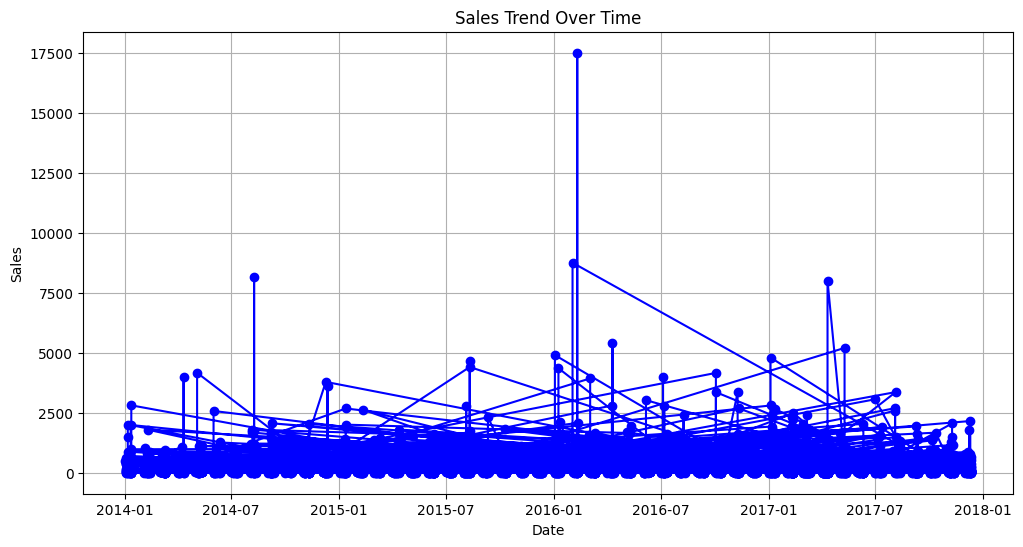

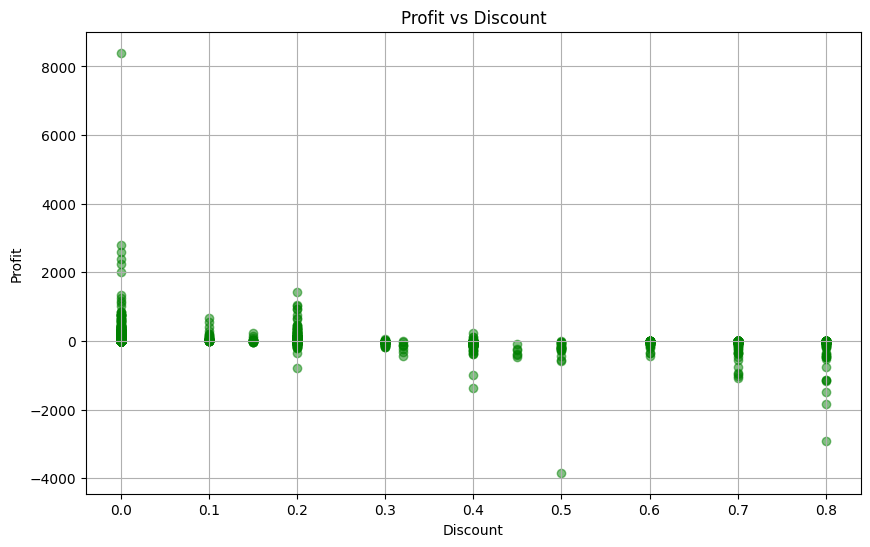

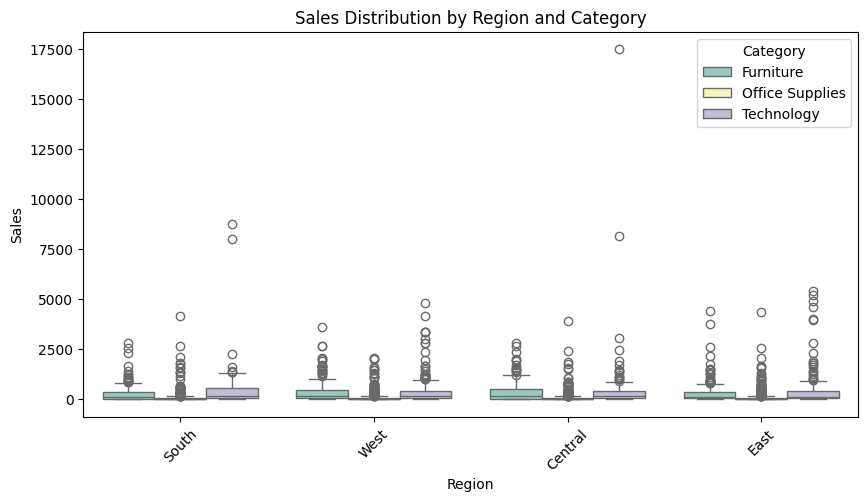

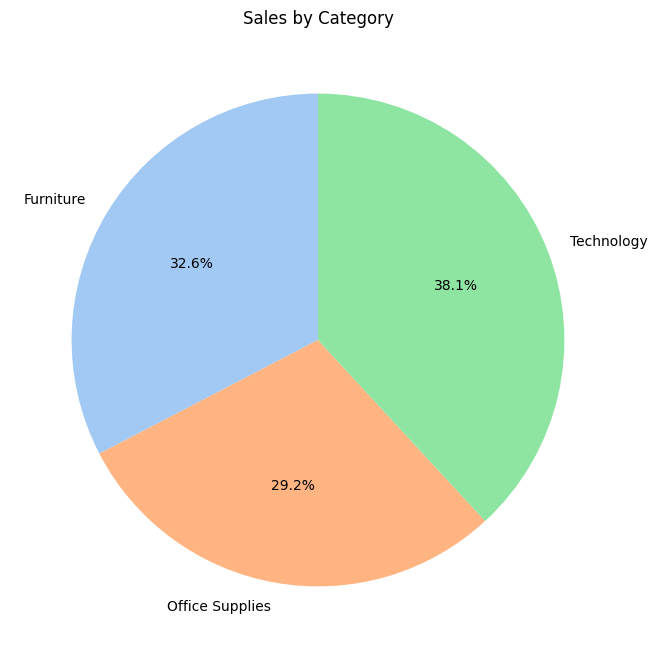

Mean Squared Error: 146657.24510088083
R-squared: 0.47518935685940544

Feature Importance:
    Feature  Importance
0  Discount  269.754838
1    Profit    1.297032

Top Performing Regions:
Region
West       276879.0215
East       249123.1290
Central    214272.0936
Name: Sales, dtype: float64

Top Selling Categories:
Category
Technology         338607.4640
Furniture          289736.2806
Office Supplies    259573.5670
Name: Sales, dtype: float64


In [21]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('store_data.csv')
print("Data loaded successfully.\n")

# Check dataset shape
print(f"Dataset shape: {df.shape}")

# Check dataset info
df.info()

# Handling missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Check for missing values
print(df.isnull().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Filling missing values
df["Sales"].fillna(df["Sales"].mean(), inplace=True)
df["Profit"].fillna(df["Profit"].mean(), inplace=True)
df["Discount"].fillna(df["Discount"].mean(), inplace=True)

# Convert 'Order Date' column to datetime format
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")

# Drop rows where Date conversion failed
df = df.dropna(subset=["Order Date"])

# Sales trend over time
df["Order Date"] = pd.to_datetime(df["Order Date"])

# Plot time series
plt.figure(figsize=(12, 6))
plt.plot(df["Order Date"], df["Sales"], marker="o", linestyle="-", color="blue")
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

# Scatter plot of profit vs Discount
plt.figure(figsize=(10, 6))
plt.scatter(df["Discount"], df["Profit"], alpha=0.5, color="green")
plt.title("Profit vs Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True)
plt.show()

# Sales distribution by region and category
plt.figure(figsize=(10, 5))
sns.boxplot(x="Region", y="Sales", hue="Category", data=df, palette="Set3")
plt.title("Sales Distribution by Region and Category")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.legend(title="Category")
plt.xticks(rotation=45)
plt.show()

# Pie chart for sales by category
category_sales = df.groupby("Category")["Sales"].sum()
plt.figure(figsize=(8, 8))
plt.pie(category_sales, labels=category_sales.index, autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
plt.title("Sales by Category")
plt.show()

# Select features and target variable
X = df[["Discount", "Profit"]]
y = df["Sales"]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Feature importance
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": model.coef_})
print("\nFeature Importance:")
print(feature_importance)

# Identifying top performing regions
top_regions = df.groupby("Region")["Sales"].sum().nlargest(3)
print("\nTop Performing Regions:")
print(top_regions)

# Identifying top selling categories
top_categories = df.groupby("Category")["Sales"].sum().nlargest(3)
print("\nTop Selling Categories:")
print(top_categories)